In [1]:
# Sky-SB codes
from skysurf_estimate_sky import calculate_sky
from make_diagnostic import make_plots

# For downloading test data
from astropy.io import fits
from astroquery.mast import Observations

# Other
from glob import glob
import pandas as pd

In [2]:
file_list = glob('*_c0m.fits')
file_list

['u2ab0103t_c0m.fits']

In [3]:
# Function to read some information from image header
def get_info_from_header(hdu_sci, sci_ext, df):
    
    # Define list of keywords from header that might be useful
    useful_keys_primary = ['CAL_VER', 'FILTNAM1', 'FILTNAM2', 'SUNANGLE', 'CENTRWV',
                           'MOONANGL', 'SUN_ALT', 'EXPSTART', 'EXPTIME', 'TARGNAME', 
                           'RA_TARG', 'DEC_TARG', 'ECL_LONG', 'ECL_LAT', 'GAL_LONG', 
                           'GAL_LAT', 'PROPOSID']
    
    useful_keys_sci = ['BUNIT', 'NAXIS1', 'NAXIS2', 'PHOTFLAM', 'PHOTZPT', 'PHOTPLAM', 'ZP_CORR']

    # Make an empty Python dictionary, that you will fill with information
    dictionary = {}

    for key in useful_keys_primary:
        dictionary[key] = [hdu_sci[0].header[key]]

    for key in useful_keys_sci:
        dictionary[key] = [hdu_sci[sci_ext].header[key]]
        
    # Combine df with the dictionary to create newdf
    newdf = pd.concat([df, pd.DataFrame(dictionary)], axis = 1)
        
    return newdf

u2ab0103t_c0m.fits SCI1
u2ab0103t_c1m.fits


/Users/rosaliaobrien/skysurf/sky_measurements/scripts/SES394_scripts_WFPC2/measureskyregion.py:43: RuntimeWarning: Mean of empty slice
  loci=np.nanmean(newdat)
/Users/rosaliaobrien/anaconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/rosaliaobrien/anaconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/rosaliaobrien/anaconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/Users/rosaliaobrien/skysurf/sky_measurements/scripts/SES394_scripts_WFPC2/measureskyregion_mean.py:43: RuntimeWarning: Mean of empty slice
  loci=np.nanmean(newdat)
/Users/rosaliaobrien/skysurf/sky_measurements/scripts/SES394_scripts_WFPC2/measureskyregion_mean.p

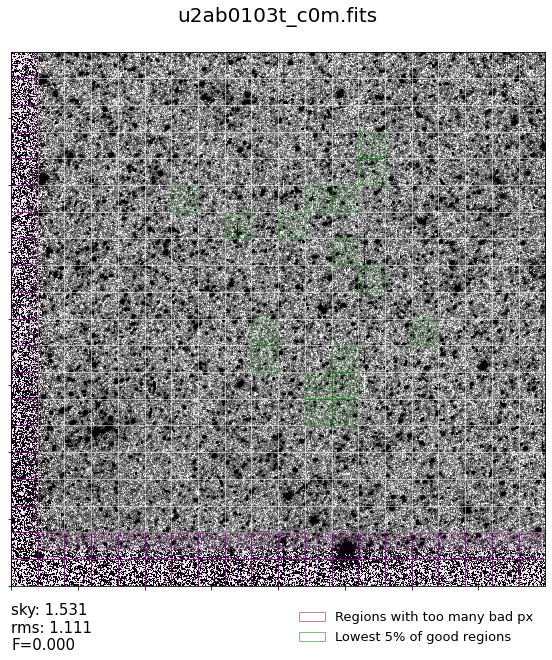

u2ab0103t_c0m.fits SCI2
u2ab0103t_c1m.fits


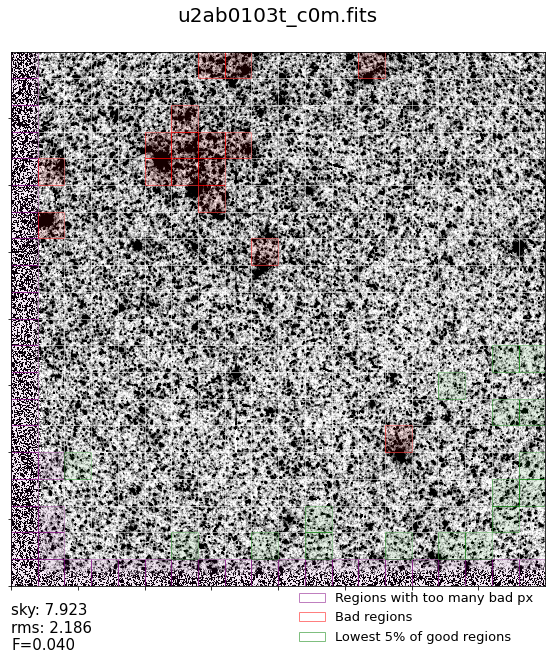

u2ab0103t_c0m.fits SCI3
u2ab0103t_c1m.fits


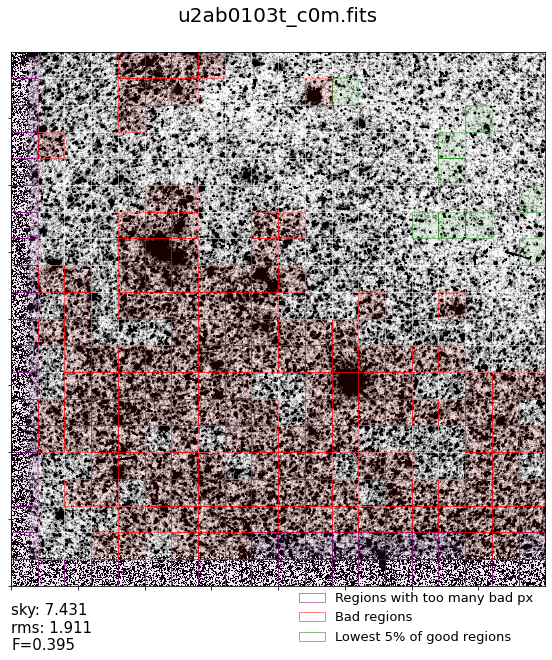

u2ab0103t_c0m.fits SCI4
u2ab0103t_c1m.fits


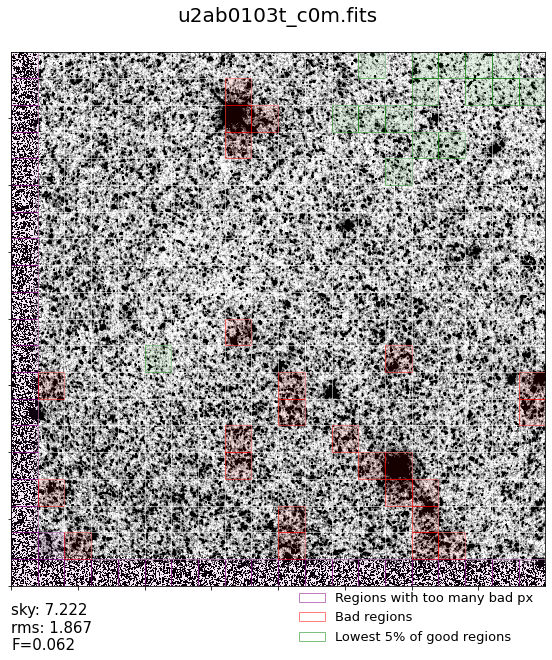

In [4]:
df = pd.DataFrame([])

for file_sci in file_list:
    
    for sci_ext in [1,2,3,4]:
        
        print(file_sci, 'SCI'+str(sci_ext))
    
        # Make small dataframe with file name
        # For Windows, need to change
        root = file_sci.split('_')[0].split('/')[-1]
        file_df = pd.DataFrame({'file': [file_sci], 'root': [root], 'sci_ext': [sci_ext]})

        # Open the fits file
        hdu_sci = fits.open(file_sci)
        
        file_dq = file_sci.replace('c0m.fits', 'c1m.fits')
        print(file_dq)
        hdu_dq = fits.open(file_dq)

        # Save the science data
        sci_data = hdu_sci[sci_ext].data

        # Save the data quality data
        dq_data = hdu_dq[sci_ext].data

        sky_dic = calculate_sky(sci_data, bin_size = 40, dq_data = dq_data, has_DQ = True, dq_fraction = 0.2)
        
        ### Make plots ###
        # Instead of showing each figure, save them in the local directory
        save_images = '{r}_sky_SCI{s}.png'.format(r = root, s = sci_ext)
        make_plots(data = sci_data, cutouts = sky_dic['cutouts'][0], 
               goodind = sky_dic['lowest5perc_ind'][0], badind = sky_dic['bad_ind'][0], 
               sky = sky_dic['calc_sky'][0], rms = sky_dic['calc_rms'][0], 
               badpx = sky_dic['badpx_ind'][0], title = file_sci, 
               save = True, savepath = save_images, 
               show = True, figsize = (15,9))

        ### Drop keys from output that we no longer need ###
        drop_keys = ['sky_arr', 'rms_arr', 'cutouts', 'lowest5perc_ind', 'bad_ind', 'badpx_ind']
        for key in drop_keys:
            sky_dic.pop(key, None)

        ### Save information to dataframe ###
        tempdf = pd.DataFrame(pd.concat([file_df, pd.DataFrame(sky_dic)], axis = 1))
        
        tempdf = get_info_from_header(hdu_sci, sci_ext, tempdf)

        df = pd.concat([df, tempdf])
        
df = df.reset_index(drop = True)

In [5]:
df

,file,root,sci_ext,calc_sky,calc_rms,N_total_regions,N_bad_regions,N_bad_px_regions,N_good_regions,calc_sky_mean,...,GAL_LONG,GAL_LAT,PROPOSID,BUNIT,NAXIS1,NAXIS2,PHOTFLAM,PHOTZPT,PHOTPLAM,ZP_CORR
0,u2ab0103t_c0m.fits,u2ab0103t,1,1.530740,1.110557,400,0,58,342,1.632768,...,120.691703,-22.090609,5237,COUNTS,800,800,2.507987e-18,-21.1,7995.937,-0.005336
1,u2ab0103t_c0m.fits,u2ab0103t,2,7.923430,2.185724,400,16,42,342,8.186174,...,120.691703,-22.090609,5237,COUNTS,800,800,2.458077e-18,-21.1,7983.444,-0.001192
2,u2ab0103t_c0m.fits,u2ab0103t,3,7.431109,1.910923,400,158,48,194,7.529998,...,120.691703,-22.090609,5237,COUNTS,800,800,2.449067e-18,-21.1,8012.216,-0.008192
3,u2ab0103t_c0m.fits,u2ab0103t,4,7.222399,1.866741,400,25,40,335,7.331154,...,120.691703,-22.090609,5237,COUNTS,800,800,2.498411e-18,-21.1,8001.599,-0.008297


Finally, we save all sky measurements into a single CSV file.

In [6]:
df.to_csv('F555W_RosaliaOBrien_binsize40.csv', index = False)